### Simulating From the Null Hypothesis

Load in the data below, and use the exercises to assist with answering the quiz questions below.

**If you get stuck, notice there is a solution notebook available by clicking on the orange jupyter icon in the top left!**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
np.random.seed(42)

full_data = pd.read_csv('coffee_dataset.csv')
sample_data = full_data.sample(200)
sample_data

,user_id,age,drinks_coffee,height
2402,2874,<21,True,64.357154
2864,3670,>=21,True,66.859636
2167,7441,<21,False,66.659561
507,2781,>=21,True,70.166241
1817,2875,>=21,True,71.369120
...,...,...,...,...
1187,6237,<21,False,62.493744
463,1857,<21,False,66.476106
1195,6397,<21,False,64.555794
1080,4065,<21,False,66.842149


`1.` If you were interested in studying whether the average height for coffee drinkers is the same as for non-coffee drinkers, what would the null and alternative hypotheses be?  Write them in the cell below, and use your answer to answer the first quiz question below.

Answer:

$$H_0: \mu_{coff} - \mu_{no} = 0$$


$$H_1: \mu_{coff} - \mu_{no} \neq 0$$

`2.` If you were interested in studying whether the average height for coffee drinkers is less than non-coffee drinkers, what would the null and alternative be?  Place them in the cell below, and use your answer to answer the second quiz question below.

Answer:

$$H_0: \mu_{coff} - \mu_{no} \geq 0$$


$$H_1: \mu_{coff} - \mu_{no} < 0$$


`3.` For 10,000 iterations: bootstrap the sample data, calculate the mean height for coffee drinkers and non-coffee drinkers, and calculate the difference in means for each sample.  You will want to have three arrays at the end of the iterations - one for each mean and one for the difference in means.  Use the results of your sampling distribution, to answer the third quiz question below.

In [2]:
means_coff, means_no, diffs=[],[],[]
for __ in range(10000):
    boot_samp = sample_data.sample(200,replace=True)

    mean_drink = boot_samp[boot_samp['drinks_coffee'] == True]['height'].mean()
    mean_no = boot_samp[boot_samp['drinks_coffee'] == False]['height'].mean()

    means_coff.append(mean_drink)
    means_no.append(mean_no)
    diffs.append(mean_drink - mean_no)




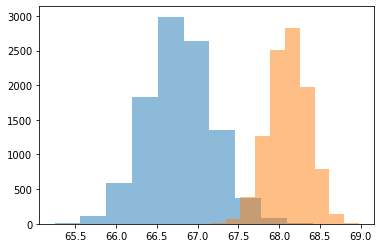

In [3]:
plt.hist(means_no, alpha = 0.5);
plt.hist(means_coff, alpha = 0.5); # They look pretty normal to me!

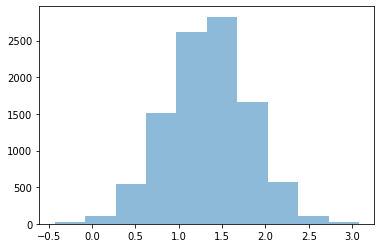

In [4]:
plt.hist(diffs, alpha = 0.5);

In [5]:
np.std(means_no) , np.std(means_coff) , np.std(diffs)

(0.4051263127747525, 0.2407376337347297, 0.46980910743871446)

`4.` Now, use your sampling distribution for the difference in means and [the docs](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.normal.html) to simulate what you would expect if your sampling distribution were centered on zero.  Also, calculate the observed sample mean difference in `sample_data`. Use your solutions to answer the last questions in the quiz below.

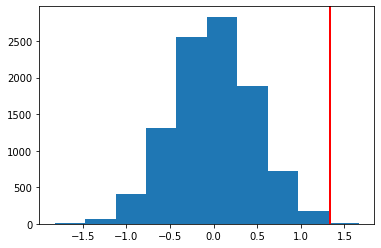

In [6]:
null_vals  = np.random.normal(loc=0, scale=np.std(diffs), size=10000)
plt.hist(null_vals);